# Text Analysis

We will explore exploratory data analysis and supervised learning for free text in this lecture. In the next lecture, we will look at unsupervised learning and topic models.

Along the way, we will use the packages

- [`sklearn`](http://scikit-learn.org/stable/)
- [`wordcloud`](https://github.com/amueller/word_cloud)
- [`nltk`](https://www.nltk.org)
- [`gensim`](https://radimrehurek.com/gensim/)

Other packages useful for text analysis include

- [`spaCy`](https://spacy.io)
- [`fasttext`](https://fasttext.cc/)

and many, many others.

## Exploratory data analysis

### Corpus

A corpus is a collection of text documents. There are many ways to create a corpus, and they may come from documents, scraped web pages, Twitter streams, speech translation and so on. The first step in any text analysis application is nearly always to create an application-specific corpus. This is important, because the language patterns in different domains are often very different (e.g. contrast medical records with legal documents with Twitter streams). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import nltk
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.collocations import QuadgramCollocationFinder, TrigramCollocationFinder
from nltk.metrics.association import QuadgramAssocMeasures, TrigramAssocMeasures
import string

#### Toy corpus

We see how a small corpus with two documents is broken down into smaller pieces 

document $\to$ paragraph $\to$ sentences $\to$ tokens

Although this explicit decomposition may not be necessary in all applications, it is still useful to be aware of these units:

- A paragraph contains an *idea*
- A sentence is a unit of syntax
- A token (word or punctuation) is the smallest meaningful unit

In [4]:
docs = [
    '''Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.

Strip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.''',
    '''Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey officia, reprehenderit bacon ipsum ullamco enim tail tongue. Brisket short ribs biltong jerky flank, venison filet mignon tenderloin culpa bacon meatball short loin commodo. Leberkas jowl prosciutto, et kielbasa pancetta chicken. Nisi minim sausage porchetta jowl.

Beef ribs pariatur pork chop dolore ex, consequat turducken frankfurter esse filet mignon lorem bacon. Elit dolore porchetta meatball ea, pork loin pork anim non sirloin. Aliquip tenderloin reprehenderit pariatur, leberkas alcatra short loin. Fugiat elit meatloaf, nulla cow in sausage. Doner consequat shankle salami est, boudin deserunt. Drumstick ham lorem reprehenderit.

Beef adipisicing nisi rump filet mignon cillum leberkas boudin tail picanha pork loin. Culpa picanha ground round in laborum spare ribs. Burgdoggen leberkas landjaeger adipisicing strip steak velit doner eu ground round meatloaf consectetur deserunt anim ball tip cow. Porchetta ad minim eiusmod labore eu nisi boudin laboris officia jowl deserunt strip steak. Shank aliquip beef ribs tri-tip ipsum flank. Turducken elit meatloaf aliqua corned beef sirloin irure. Tongue cupim ullamco in sint prosciutto.'''
]

##### Documents

In [5]:
docs

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.\n\nStrip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.',
 'Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey of

In [6]:
from itertools import chain

In [7]:
def flatten(listOfLists):
    return list(chain.from_iterable(listOfLists))

#### Paragraphs

In [8]:
paras = flatten([doc.split('\n\n') for doc in docs])

In [9]:
paras[:3]

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur. Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef. Dolor proident salami deserunt. Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef. Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.',
 'Strip steak meatball chuck aute, pork loin turkey pork commodo et officia. Rump enim spare ribs, prosciutto chuck deserunt tail. Aute pork lorem sausage. Nostrud dolore kevin proident pork chop do in. Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock. Ground round fatback ribeye turkey tri-tip capicola.',
 'Burgdoggen id ham hock ut kielbasa. Eu pork chop anim picanha sed porchetta dolor consequat drumstick shankle proident pork andouille. Et cupim burgdoggen, officia lorem shank ut sed drumstick shankle salami ad ball tip dolore pig. Shankle turkey o

##### Sentences

In [10]:
sentences = flatten([nltk.tokenize.sent_tokenize(para) for para in paras])

In [11]:
sentences[:10]

['Spicy jalapeno bacon ipsum dolor amet aute prosciutto velit corned beef consectetur.',
 'Aute kielbasa adipisicing, nostrud drumstick ipsum tail pig capicola burgdoggen corned beef.',
 'Dolor proident salami deserunt.',
 'Venison capicola pork belly bacon aliquip swine incididunt sint quis cupidatat pork chop et turducken nulla beef.',
 'Ground round kielbasa tri-tip consectetur, t-bone pariatur deserunt id ut adipisicing.',
 'Strip steak meatball chuck aute, pork loin turkey pork commodo et officia.',
 'Rump enim spare ribs, prosciutto chuck deserunt tail.',
 'Aute pork lorem sausage.',
 'Nostrud dolore kevin proident pork chop do in.',
 'Exercitation shoulder dolore kevin ut, sausage ullamco frankfurter ham hock.']

In [12]:
tokens = flatten([nltk.tokenize.word_tokenize(sentence) for sentence in sentences])

In [13]:
tokens[:10]

['Spicy',
 'jalapeno',
 'bacon',
 'ipsum',
 'dolor',
 'amet',
 'aute',
 'prosciutto',
 'velit',
 'corned']

### Exploratory analysis of the  `newsgroup` corpus

In [14]:
from sklearn.datasets import fetch_20newsgroups

For convenience, we will use an existing corpus - the 20 newsgroups dataset that comprises around 18000 newsgroups posts on 20 topics. The 20 topics are

```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```

In [15]:
newsgroups_train = fetch_20newsgroups(
    subset='train',
    categories=('rec.sport.baseball', 
                'rec.sport.hockey',
                'sci.med',
                'sci.space'),
    
    remove=('headers', 'footers', 'quotes'))

In [16]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [17]:
newsgroups_train.description

'the 20 newsgroups by date dataset'

In [18]:
newsgroups_train.filenames.shape

(2384,)

In [19]:
newsgroups_train.target.shape

(2384,)

In [20]:
newsgroups_train.target_names

['rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'sci.space']

In [21]:
newsgroups_train.data[0]

'\nA freeze dried Tootsie Roll (tm).  The actual taste sensation was like nothing\nyou will ever willingly experience.  The amazing thing was that we ate a second\none, and a third and ....\n\nI doubt that they actually flew on missions, as I\'m certain they did "bad\nthings" to the gastrointestinal tract.  Compared to Space Food Sticks, Tang was\na gastronomic contribution to mankind.\n--\nDillon Pyron                      | The opinions expressed are those of the\nTI/DSEG Lewisville VAX Support    | sender unless otherwise stated.\n(214)462-3556 (when I\'m here)     |\n(214)492-4656 (when I\'m home)     |God gave us weather so we wouldn\'t complain\npyron@skndiv.dseg.ti.com          |about other things.\nPADI DM-54909                     |'

### Getting word counts

In [22]:
from sklearn.feature_extraction.text import (
    HashingVectorizer,
    TfidfVectorizer, 
    CountVectorizer, 
)

In [23]:
vectorizer = CountVectorizer()

In [24]:
idx = np.nonzero(
    newsgroups_train.target == 
    newsgroups_train.target_names.index('rec.sport.baseball')
)[0]
baseball_sample = [newsgroups_train.data[i] for i in idx]

In [25]:
X = vectorizer.fit_transform(baseball_sample)

In [26]:
vocab = vectorizer.get_feature_names()

In [27]:
rownames = [':'.join(filename.split('/')[-2:]) 
            for filename in newsgroups_train.filenames[idx]]
df = pd.SparseDataFrame(X, columns=vocab, index=rownames)

In [28]:
freqs = df.sum(axis=0).astype('int')

In [29]:
freqs.nlargest(10)

the     3508
to      1481
and     1312
of      1142
in      1114
that     882
is       842
he       738
for      580
it       543
dtype: int64

### Distribution of word counts

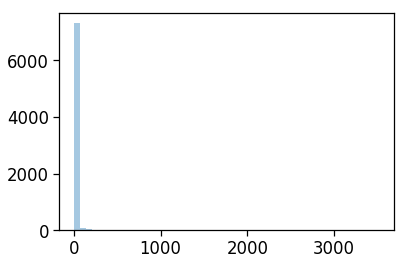

In [30]:
sns.distplot(freqs, kde=False)
pass

### Zipf's law

The number of words that occur with frequency $f$ is a random variable with a power law distribution

$$
p(f) = \alpha f^{1-1/s}
$$

Random variables that follow a power law distribution look linear on a log-log plot.

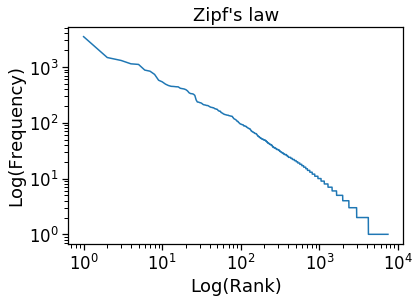

In [31]:
xs = freqs.sort_values(ascending=False).reset_index(drop=True, )
plt.loglog(xs.index + 1, xs)
plt.xlabel('Log(Rank)')
plt.ylabel('Log(Frequency)')
plt.title("Zipf's law")
pass

### Stop words, lemmatization and stemming

We can try to reduce the number of tokens using the simple strategies of stop words, stemming and lemmatization.

#### Stop words

The most common words are not very informative, and we may wish to remove them. There are other ways to handle this (e.g. with TF-IDF vectorizers) but we will simply use stop words for this section.

In [32]:
vectorizer = CountVectorizer(stop_words='english')

In [33]:
idx = np.nonzero(
    newsgroups_train.target == 
    newsgroups_train.target_names.index('rec.sport.baseball')
)[0]
baseball_sample = [newsgroups_train.data[i] for i in idx]

In [34]:
X = vectorizer.fit_transform(baseball_sample)

In [35]:
vocab = vectorizer.get_feature_names()

In [36]:
rownames = [':'.join(filename.split('/')[-2:]) 
            for filename in newsgroups_train.filenames[idx]]
df = pd.SparseDataFrame(X, columns=vocab, index=rownames)

In [37]:
freqs = df.sum(axis=0).astype('int')

We will also drop numbers.

In [38]:
freqs = freqs[~freqs.index.str.isnumeric()]

Now the most common words are more informative.

In [39]:
freqs.nlargest(15)

year        310
game        204
good        200
team        195
think       189
don         186
just        161
like        153
games       149
better      140
baseball    137
hit         137
runs        137
players     135
time        131
dtype: int64

#### Stemming

Stemming is the attempt to identify the common roots of words using prefix and suffix rules.

In [40]:
def tokenize(text):
    stem = SnowballStemmer('english')
    text = text.lower()
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation:
            continue
        yield stem.stem(token)

In [41]:
text = '''circle circles circular circularity 
circumference circumscribe circumstantial
infer inference inferences inferential'''

In [42]:
list(tokenize(text))

['circl',
 'circl',
 'circular',
 'circular',
 'circumfer',
 'circumscrib',
 'circumstanti',
 'infer',
 'infer',
 'infer',
 'inferenti']

#### Lemmatization

Lemmatization also attempts to identify the common roots of words, but uses dictionary lookup to do so. Lemmatization often gives better results than stemming, but is slower.

In [43]:
def tokenize(text):
    lem = WordNetLemmatizer()
    text = text.lower()
    
    for token in nltk.word_tokenize(text):
        if token in string.punctuation:
            continue
        yield lem.lemmatize(token)

In [44]:
list(tokenize(text))

['circle',
 'circle',
 'circular',
 'circularity',
 'circumference',
 'circumscribe',
 'circumstantial',
 'infer',
 'inference',
 'inference',
 'inferential']

### Word cloud

In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud = WordCloud().generate(' '.join(freqs.nlargest(200).index))
pass

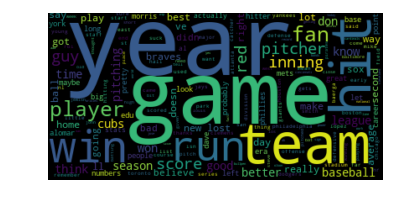

In [47]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
pass

In [48]:
from imageio import imread

In [49]:
rabbit = imread('data/rabbit.png').astype('ubyte')

In [50]:
wc = WordCloud(mask=rabbit[:,:,0], 
               mode='RGBA',
               background_color=None)
wc.generate(' '.join(freqs.nlargest(200).index))
pass

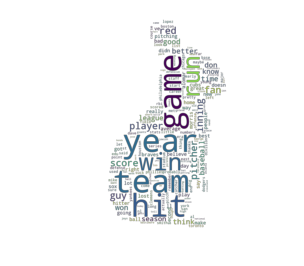

In [51]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
pass

## Supervised Learning

A general framework for supervised learning on text is

construct corpus $\to$ vectorization of features $\to$ classification $\to$ evaluation (often by cross-validation)

For example, we may classify documents into topics, or by sentiment, or as spam/not spam.

### Vectorization of features

There are 3 common methods to vectorize features when the text is treated as a bag of words - word count, one hot encoding and TF-IDF.

In [52]:
small_sample = """Do you like green eggs and ham?
I do not like them, Sam-I-am.
I do not like green eggs and ham!
Would you like them here or there?
I would not like them here or there.
I would not like them anywhere.
I do so like green eggs and ham!
Thank you! Thank you,
Sam-I-am!""".splitlines()

In [53]:
small_sample

['Do you like green eggs and ham?',
 'I do not like them, Sam-I-am.',
 'I do not like green eggs and ham!',
 'Would you like them here or there?',
 'I would not like them here or there.',
 'I would not like them anywhere.',
 'I do so like green eggs and ham!',
 'Thank you! Thank you,',
 'Sam-I-am!']

#### Word counts

In [54]:
count_vectorizer = CountVectorizer()

In [55]:
X = count_vectorizer.fit_transform(small_sample)

In [56]:
vocab = count_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Hashing

If the number of words is too large, we can hash words into a fixed number of buckets to keep the computations tractable. However, we lose the ability to map back to the original tokens.

In [57]:
hash_vectorizer = HashingVectorizer(n_features=5)

In [58]:
X = hash_vectorizer.fit_transform(small_sample)

In [59]:
X.toarray()

array([[-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [ 0.5       ,  0.5       ,  0.        ,  0.5       , -0.5       ],
       [-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [-0.57735027,  0.        ,  0.57735027,  0.        , -0.57735027],
       [-0.57735027,  0.        ,  0.57735027,  0.        , -0.57735027],
       [-0.90453403,  0.        ,  0.        ,  0.30151134, -0.30151134],
       [-0.60302269,  0.30151134,  0.30151134,  0.30151134,  0.60302269],
       [-0.70710678,  0.        ,  0.        ,  0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

#### One hot encoding

One hot encoding simply sets words with non-zero counts to 1.

In [60]:
one_hot_vectorizer = CountVectorizer(binary=True)

In [61]:
X = one_hot_vectorizer.fit_transform(small_sample)

In [62]:
vocab = one_hot_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF

You have previously implemented this in your homework.

In [63]:
tf_idf_vectorizer = TfidfVectorizer()

In [64]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [65]:
X = tf_idf_vectorizer.fit_transform(small_sample)

In [66]:
vocab = tf_idf_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,anywhere,do,eggs,green,ham,here,like,not
0,0.000000,0.401996,0.00000,0.355186,0.401996,0.401996,0.401996,0.000000,0.256589,0.000000
1,0.495165,0.000000,0.00000,0.380398,0.000000,0.000000,0.000000,0.000000,0.274803,0.380398
2,0.000000,0.409316,0.00000,0.361653,0.409316,0.409316,0.409316,0.000000,0.261261,0.361653
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.429929,0.238598,0.000000
4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.436672,0.242341,0.335463
5,0.000000,0.000000,0.62005,0.000000,0.000000,0.000000,0.000000,0.000000,0.290641,0.402322
6,0.000000,0.376827,0.00000,0.332947,0.376827,0.376827,0.376827,0.000000,0.240523,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.707107,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Maintaining context

For some supervised learning tasks such as sentiment analysis (is this review positive or negative), the context of words is very important. For example the following two reviews use very similar words but have very different meanings.

- `Only an idiot like Reviewer two could love that movie`
- `Could not love that movie more. Reviewer one is an idiot`

In this case, we need to take the context of individual words into account. Common ways to take context into account include the use N-grams (also known as colocations), part-of-speech (POS) tagging and grammars, and the `word2vec` family of algorithms.

### N-grams

In [67]:
count_vectorizer = CountVectorizer(ngram_range=(1,3))

In [68]:
X = count_vectorizer.fit_transform(small_sample)

In [69]:
vocab = count_vectorizer.get_feature_names()
df = pd.SparseDataFrame(X, columns=vocab)
df.fillna(0).iloc[:, :10]

,am,and,and ham,anywhere,do,do not,do not like,do so,do so like,do you
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Significant collocation

Most n-grams are not meaningfully phrases. We can use statistical tests for the likelihood of co-occurrence of words, and only use the significant collocations. Basically we test against the null hypothesis that the words in the n-gram appear by chance if the probability of each word was independently derived from its empirical frequency. 

In [70]:
abstract = '''Macrophages represent one of the most numerous and diverse 
leukocyte types in the body. Furthermore, they are important regulators 
and promoters of many cardiovascular disease programs. Their functions 
range from sensing pathogens to digesting cell debris, modulating inflammation, 
and producing key cytokines and other regulatory factors throughout the body. 
Macrophage research has undergone a renaissance in recent years, which 
has propelled a newfound interest in their heterogeneity as well as a 
new understanding of ontological differences in their development. 
In addition, recent technological advances such as single-cell 
mass-cytometry by time-of-flight have enabled phenotype and functional 
analyses of individual immune myeloid cells, including macrophages, 
at unprecedented resolution. In this Part 1 of a 4-part review series 
covering the macrophage in cardiovascular disease, we focus on the 
basic principles of macrophage development, heterogeneity, phenotype, 
tissue-specific differentiation, and functionality as a basis to understand 
their role in cardiovascular disease.'''

In [71]:
ngrams = TrigramCollocationFinder.from_words(nltk.tokenize.word_tokenize(abstract))

In [72]:
scores = ngrams.score_ngrams(TrigramAssocMeasures.likelihood_ratio)

In [73]:
scores[:5]

[(('in', 'cardiovascular', 'disease'), 60.22140084295821),
 (('cardiovascular', 'disease', 'programs'), 57.490270384342544),
 (('many', 'cardiovascular', 'disease'), 57.490270384342544),
 (('cardiovascular', 'disease', '.'), 49.568274269761346),
 (('cardiovascular', 'disease', ','), 47.586079738744886)]

In [74]:
scores[-5:]

[(('development', ',', 'heterogeneity'), 18.377430413805826),
 (('heterogeneity', ',', 'phenotype'), 18.377430413805826),
 (('the', 'macrophage', 'in'), 17.35538066534174),
 ((',', 'heterogeneity', ','), 12.326088385780718),
 ((',', 'phenotype', ','), 12.326088385780718)]

### Word2Vec

the `word2vec` family of algorithms is a powerful method for converting a word into a vector that takes into account its context. There are two main ideas - in continuous bag of words, we try to predict the current word from nearby words; in continuous skip-gram, the current word is used to predict nearby words. The phrase "nearby words" is intentionally vague - in the simplest case, it is a sliding window of words centered on the current word. 

Suppose we have the sentence

```
I do not like green eggs and ham
```

and suppose we use a centered window of length 3,

```
((I, not), do), ((do, like), not), ((not, green), like), ((like, eggs), green), ((green, and), eggs), ((eggs, ham) and)
```

In continuous bag of words, we make the (input, output) pairs to be
```
(I, do)
(not, do)
(do, not)
(like, not)
(not, like)
(green, like)
(like, green)
(eggs, green)
(green, eggs)
(and, eggs)
(eggs, and)
(ham, and)
```

That is, we try to predict `do` when we see `I`, `do` when we see `not` and so on.

In continuous skip-gram, we do the inverse for (input, output) pairs
```
(do, I)
(do, not)
(not, do)
(not, like)
(like, not)
(like, green)
(green, like)
(green, eggs)
(eggs, green)
(eggs, and)
(and, eggs)
(and, ham)
```

That is, we try to predict `I` when we see `do`, `not` when we see `do` and so on.

To do this prediction, we first assign each word to a vector of some fixed length $n$ - i.e. we embed each word as an $\mathbb{R}^n$ vector. To do a prediction for all words in the vocabulary using `softmax` would be prohibitively expensive, and is unnecessary if we are just trying to find a good embedding vector. Instead we select $k$ noise words, typically from the unigram distributions, and just train the classifier to distinguish the target word from the noise words using logistic regression (negative sampling). We use stochastic gradient descent to move the embedding word vectors (initialized randomly) until the model gives a high probability to the target words and low probability to the noise ones. If successful, words that are meaningful when substituted in the same context will be close together in $\mathbb{R}^n$. For instance, `dog` and `cat` are likely to be close together because they appear together in similar contexts like

- `My pet dog|cat`
- `Raining dogs|cats and cats|dogs`
- `The dog|cat chased the rat`
- `Common pets are dogs|cats`

while `dog` and `apple` are less likely to occur in the same context and hence will end up further apart in the embedding space. Interestingly, the vectors resulting from vector subtraction are also meaningful since they represent analogies - the vector between `man` and `woman` is likely to be similar to that between `king` and `queen`, or `boy` and `girl`.

Note: you will encounter `word2vec` again if you take a deep learning class - it is a very influential idea and has many applications beyond text processing since you can apply it to any discrete distribution where local context is meaningful (e.g. genomes). 

In [75]:
import gensim
from gensim.models.word2vec import Word2Vec

In [76]:
baseball_sample[:1]

["\n\n\n Hmmm...what about walks and SB? Baerga got clobbered by Alomar in OBP and\nbeat him in SLG by a lesser margin. Even putting aside any other factors,\na player with a 51 point edge in OBP is more productive than a player with\na 28 point edge in SLG. The issue has been studied before, and I doubt you\ncould come up with any convincing argument the other way.\n People see the batting average and the HR, but they don't really know  \ntheir value is worth unless they've studied the issue closely. The fact is that\nBaerga ate up a LOT more outs than Alomar; while Baerga was making outs,\nAlomar was drawing walks and being on base for Carter, Winfield et.al."]

In [77]:
def gen_sentences(corpus):
    for item in corpus:
        yield from nltk.tokenize.sent_tokenize(item)

In [78]:
list(gen_sentences(baseball_sample[:2]))[:3]

['\n\n\n Hmmm...what about walks and SB?',
 'Baerga got clobbered by Alomar in OBP and\nbeat him in SLG by a lesser margin.',
 'Even putting aside any other factors,\na player with a 51 point edge in OBP is more productive than a player with\na 28 point edge in SLG.']

In [79]:
list(baseball_sample[:2])

["\n\n\n Hmmm...what about walks and SB? Baerga got clobbered by Alomar in OBP and\nbeat him in SLG by a lesser margin. Even putting aside any other factors,\na player with a 51 point edge in OBP is more productive than a player with\na 28 point edge in SLG. The issue has been studied before, and I doubt you\ncould come up with any convincing argument the other way.\n People see the batting average and the HR, but they don't really know  \ntheir value is worth unless they've studied the issue closely. The fact is that\nBaerga ate up a LOT more outs than Alomar; while Baerga was making outs,\nAlomar was drawing walks and being on base for Carter, Winfield et.al.",
 '\nWell, actually, most of ours is based on what really happened and yours is\nbased on some fantasy of how it happened. But that\'s OK, I understand you\nhave a hockey background. Stats like "plus/minus" make RBI look good.\n\n\nOK, how about a straigh answer, then. Here\'s a very simele question to which\nI\'m sure a fair n

In [80]:
docs = [gensim.utils.simple_preprocess(s) 
        for s in baseball_sample]

In [82]:
model = Word2Vec(docs,
                 size=64, # we use 64 dimensions to represent each word
                 window=5, # size of each context window
                 min_count=3, # ignore words with frequency less than this
                 workers=4)

In [83]:
model.train(docs, total_examples=len(docs), epochs=10)

452233

The embedding vector for the word `player`

In [84]:
model.wv.word_vec('you')

array([ 0.7713789 ,  0.43055907,  0.61522204,  1.4651952 ,  0.05001011,
        0.48262414,  0.7257428 , -0.00536006, -0.7029651 , -0.8721523 ,
        0.43526617,  1.2461479 ,  0.19590075, -0.638072  , -0.6258417 ,
        0.36686298, -0.14461583,  0.05929692, -0.9040423 , -0.5402682 ,
       -0.6128281 , -0.8761068 , -0.25080758, -0.09700577,  0.75416625,
        0.6550872 , -1.7193297 , -0.0190513 ,  0.4467884 , -0.584724  ,
       -0.3895358 , -0.40714896, -0.8728606 ,  0.29505777,  0.2994968 ,
       -0.286745  , -0.8184189 , -1.1402744 ,  1.0148739 , -0.38571364,
        0.40325138, -0.6930537 , -0.30064976,  0.18087469, -0.03105755,
        0.40508395,  0.4751985 ,  0.41248563, -0.39704823, -1.0183877 ,
       -0.6843245 , -0.58843505, -0.06171968,  1.2597564 , -0.13485442,
       -0.30603904,  0.13577543, -0.20978698,  0.5741655 ,  0.08652557,
        0.5681614 , -0.09292254, -0.67014855,  1.0237669 ], dtype=float32)

In [85]:
model.wv.most_similar('you', topn=5)

[('me', 0.9936753511428833),
 ('what', 0.9931192398071289),
 ('do', 0.9917075634002686),
 ('we', 0.9907569885253906),
 ('know', 0.9862799644470215)]

In [86]:
model.wv.similarity('you', 'me')

0.9936754160245655

In [87]:
model.wv.similarity('you', 'red')

0.2705130180983498